In [1]:
import tensorflow as tf

## 1.序列表示方法
具有先后顺序的数据一般叫作序列(Sequence)，比如随时间而变化的商品价格数据就是非常典型的序列。  
序列信号表示起来并不麻烦，只需要一个 shape 为[𝑏, 𝑠]的张量即可，其中𝑏为序列数量，𝑠为序列长度。但是对于很多信号并不能直接用一个标量数值表示，比如每个时间戳产生长度为𝑛的特征向量，则需要 shape 为[𝑏, 𝑠, 𝑛]的张量才能表示。考虑更复杂的文本数据：句子。它在每个时间戳上面产生的单词是一个字符，并不是数值，不能直接用某个标量表示。我们已经知道神经网络本质上是一系列的矩阵相乘、相加等数学运算，它并不能够直接处理字符串类型的数据。如果希望神经网络能够用于自然语言处理任务，那么怎么把单词或字符转化为数值就变得尤为关键。

我们把文字编码为数值的过程叫作 Word Embedding。One-hot 的编码方式实现 Word Embedding 简单直观，编码过程不需要学习和训练。但是 One-hot 编码的向量是高维度而且极其稀疏的，大量的位置为 0，计算效率较低，同时也不利于神经网络的训练。从语义角度来讲，One-hot 编码还有一个严重的问题，它忽略了单词先天具有的语义相关性。 

在神经网络中，单词的表示向量可以直接通过训练的方式得到，我们把单词的表示层叫作 Embedding 层。  
它可以捕捉到单词先天具有的语义相关性，通过余弦相似度判断Embedding层模型的好坏。

### 1.1 Embedding层
Embedding 层负责把单词编码为某个词向量𝒗，它接受的是采用数字编码的单词编号𝑖，如 2 表示“I”，3 表示“me”等  
Embedding 层是可训练的，它可放置在神经网络之前，完成单词到向量的转换，得到的表示向量可以继续通过神经网络完成后续任务，并计算误差ℒ，采用梯度下降算法来实现端到端(end-to-end)的训练。  
**在 TensorFlow 中，可以通过 layers.Embedding(𝑁,𝑛)来定义一个 Word Embedding层，其中𝑁参数指定词汇数量，𝑛指定单词向量的长度**。

In [2]:
x=tf.range(10)
x=tf.random.shuffle(x)
x

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([2, 5, 6, 7, 0, 9, 8, 3, 4, 1])>

In [3]:
net = tf.keras.layers.Embedding(10,4)

In [4]:
net(x)

<tf.Tensor: shape=(10, 4), dtype=float32, numpy=
array([[-0.04483889, -0.00737715, -0.0135491 ,  0.03746103],
       [-0.04644392,  0.01336331,  0.02334348,  0.02727475],
       [-0.01546945,  0.03311065, -0.01795958,  0.02020888],
       [ 0.01337122, -0.02624604,  0.02010249,  0.04752778],
       [ 0.01033034,  0.04552158,  0.00628078, -0.04171622],
       [-0.02899526, -0.00320548,  0.02663866,  0.00272181],
       [-0.04646331,  0.03685336,  0.03387684, -0.01457221],
       [-0.00948005, -0.01218463,  0.01811275, -0.03168601],
       [ 0.01780038,  0.01763501,  0.01367347,  0.02512236],
       [-0.01317627,  0.02646497, -0.04341731, -0.01217437]],
      dtype=float32)>

In [5]:
net.embeddings

<tf.Variable 'embedding/embeddings:0' shape=(10, 4) dtype=float32, numpy=
array([[ 0.01033034,  0.04552158,  0.00628078, -0.04171622],
       [-0.01317627,  0.02646497, -0.04341731, -0.01217437],
       [-0.04483889, -0.00737715, -0.0135491 ,  0.03746103],
       [-0.00948005, -0.01218463,  0.01811275, -0.03168601],
       [ 0.01780038,  0.01763501,  0.01367347,  0.02512236],
       [-0.04644392,  0.01336331,  0.02334348,  0.02727475],
       [-0.01546945,  0.03311065, -0.01795958,  0.02020888],
       [ 0.01337122, -0.02624604,  0.02010249,  0.04752778],
       [-0.04646331,  0.03685336,  0.03387684, -0.01457221],
       [-0.02899526, -0.00320548,  0.02663866,  0.00272181]],
      dtype=float32)>

这些词向量随机初始化的，尚未经过网络训练.

In [6]:
net.trainable,net.embeddings.trainable

(True, True)

In [7]:
net.trainable_variables

[<tf.Variable 'embedding/embeddings:0' shape=(10, 4) dtype=float32, numpy=
 array([[ 0.01033034,  0.04552158,  0.00628078, -0.04171622],
        [-0.01317627,  0.02646497, -0.04341731, -0.01217437],
        [-0.04483889, -0.00737715, -0.0135491 ,  0.03746103],
        [-0.00948005, -0.01218463,  0.01811275, -0.03168601],
        [ 0.01780038,  0.01763501,  0.01367347,  0.02512236],
        [-0.04644392,  0.01336331,  0.02334348,  0.02727475],
        [-0.01546945,  0.03311065, -0.01795958,  0.02020888],
        [ 0.01337122, -0.02624604,  0.02010249,  0.04752778],
        [-0.04646331,  0.03685336,  0.03387684, -0.01457221],
        [-0.02899526, -0.00320548,  0.02663866,  0.00272181]],
       dtype=float32)>]

### 1.2预训练Embedding层

Embedding 层的查询表是随机初始化的，需要从零开始训练。实际上，我们可以使用预训练的 Word Embedding 模型来得到单词的表示方法，基于预训练模型的词向量相当于迁移了整个语义空间的知识，往往能得到更好的性能。

目前应用的比较广泛的预训练模型有 Word2Vec 和 GloVe 等。它们已经在海量语料库训练得到了较好的词向量表示方法，并可以直接导出学习到的词向量表，方便迁移到其它任务。

那么如何使用这些预训练的词向量模型来帮助提升 NLP 任务的性能？非常简单，对于Embedding 层，不再采用随机初始化的方式，而是利用我们已经预训练好的模型参数去初始化 Embedding 层的查询表。

In [ ]:
def embedding_pretrained():
    word_index = tf.keras.datasets.imdb.get_word_index()
    embeddings_index = {}
    with open('glove.6B.50d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    num_words = min(10000, len(word_index))
    embedding_matrix = np.zeros((num_words, 100))
    for word, i in word_index.items():
        if i >= 10000:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
net.set_weights([embedding_pretrained()])

经过预训练的词向量模型初始化的 Embedding 层可以设置为不参与训练：net.trainable = False，那么预训练的词向量就直接应用到此特定任务上；如果希望能够学到区别于预训练词向量模型不同的表示方法，那么可以把 Embedding 层包含进反向传播算法中去，利用梯度下降来微调单词表示方法。

## 2. 循环神经网络

为了便于表达，我们以情感分类任务为例，如图所示。情感分类任务通过分析给出的文本序列，提炼出文本数据表达的整
体语义特征，从而预测输入文本的情感类型：正面评价或者负面评价。从分类角度来看，情感分类问题就是一个简单的二分类问题，与图片分类不一样的是，由于输入是文本序列，传统的卷积神经网络并不能取得很好的效果。那么什么类型的网络擅长处理序列数据呢？

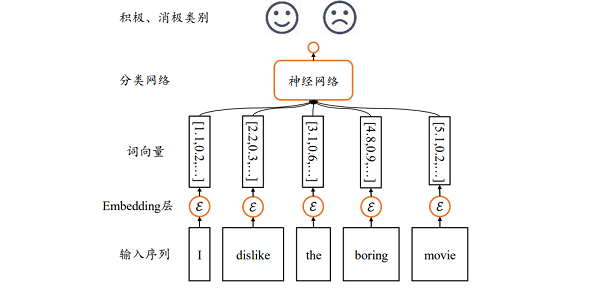

### 2.1 使用全连接层

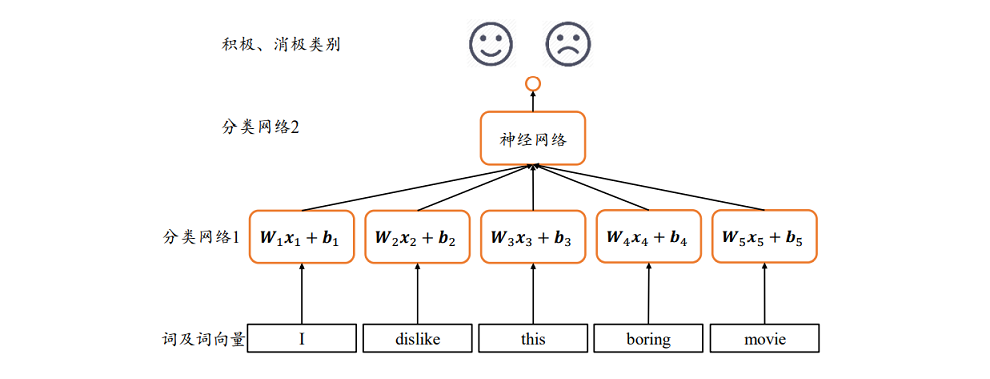

缺点：  
❑ 网络参数量是相当可观的，内存占用和计算代价较高，同时由于**每个序列的长度𝑠并不相同，网络结构是动态变化的**  
❑ 每个全连接层子网络𝑾𝑖和𝒃𝑖只能感受当前词向量的输入，并不能感知之前和之后的语境信息，导致**句子整体语义的缺失，每个子网络只能根据自己的输入来提取高层特征**，有如管中窥豹.  

### 2.1.1使用权值共享

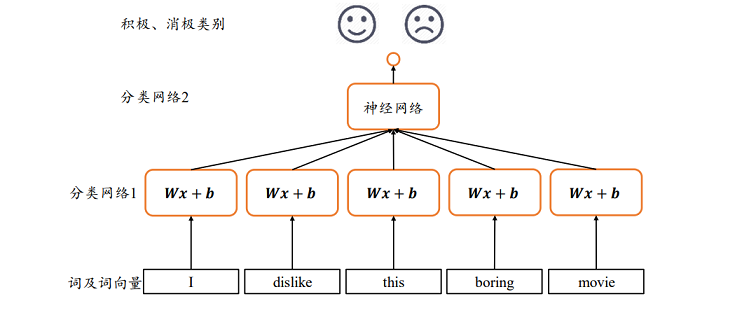

通过权值共享后，参数量大大减少，网络训练变得更加稳定高效。但是，这种网络结构并没有考虑序列之间的先后顺序，将词向量打乱次序仍然能获得相同的输出，无法获取有效的全局语义信息。

### 2.1.2 全局语义

如何赋予网络提取整体语义特征的能力呢？或者说，如何让网络能够按序提取词向量的语义信息，并累积成整个句子的全局语义信息呢？我们想到了**内存(Memory)机制。如果网络能够提供一个单独的内存变量，每次提取词向量的特征并刷新内存变量，直至最后一个输入完成，此时的内存变量即存储了所有序列的语义特征，并且由于输入序列之间的先后顺序，使得内存变量内容与序列顺序紧密关联**。

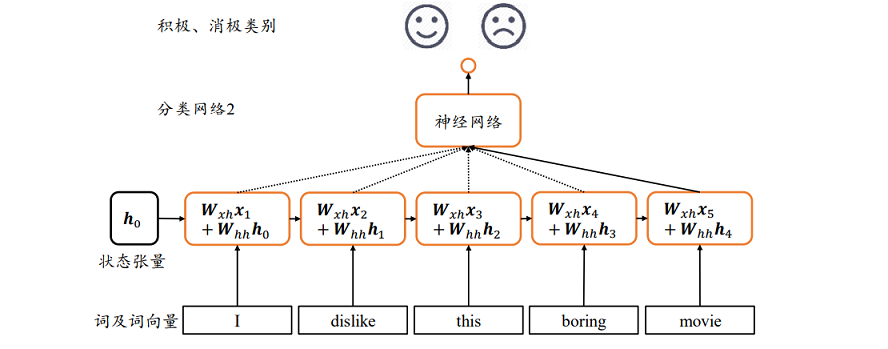

我们将上述 Memory机制实现为一个状态张量h，如图所示，除了原来的$𝑾_{xh}$参数共享外，这里额外增加了一个$𝑾_{hh}$参数，每个时间戳𝑡上状态张量h刷新机制为：  
  
  $$h_𝑡 = 𝜎(𝑾_{𝒙𝑡}x_t + 𝑾_{hh}h_{𝑡−1} + 𝒃)$$  
其中状态张量$h_0$为初始的内存状态，可以初始化为全0，经过𝑠个词向量的输入后得到网络最终的状态张量$h_𝑠$,$h_𝑠$较好地代表了句子的全局语义信息，基于$h_𝑠$通过某个全连接层分类器即可完成情感分类任务。

### 2.1.3循环神经网络


通过一步步地探索，我们最终提出了一种“新型”的网络结构，如图所示，在每个时间戳𝑡，网络层接受当前时间戳的输入$𝒙_𝑡$和上一个时间戳的网络状态向量$h_{𝑡−1}$，经过  
$$h_{𝑡} = 𝑓_𝜃(h_{𝑡−1},𝒙_𝑡)$$  
变换后得到当前时间戳的新状态向量$h_{𝑡}$，并写入内存状态中，其中$𝑓_𝜃$代表了网络的运算逻辑，𝜃为网络参数集。在每个时间戳上，网络层均有输出产生$𝒐_𝑡$，$𝒐_𝑡 = 𝑔_𝜙(𝑡)$，即将网络的状态向量变换后输出。

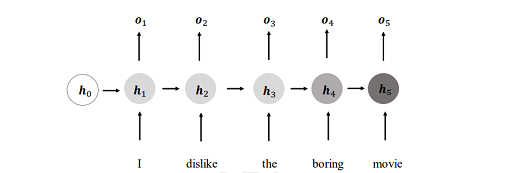

如果使用张量$𝑾_{xh},𝑾_{hh}$和偏置𝒃来参数化$𝑓_𝜃$网络，并按照  
$$h_𝑡 = 𝜎(𝑾_{𝒙𝑡}x_t + 𝑾_{hh}h_{𝑡−1} + 𝒃)$$  
方式更新内存状态，我们把这种网络叫做基本的循环神经网络，如无特别说明，一般说的循环神经网络即指这种实现。

在循环神经网络中，激活函数更多地采用 tanh 函数，并且可以选择不使用偏执𝒃来进一步减少参数量。状态向量$h_𝑡$可以直接用作输出，即$𝒐_𝑡 = h_𝑡$，也可以对$h_𝑡$做一个简单的线性变换$𝒐_𝑡 = 𝑊_{ho}h_𝑡$后得到每个时间戳上的网络输出$𝒐_𝑡$.

## 3.梯度传播

$$h_𝑡 = 𝜎(𝑾_{𝒙𝑡}x_t + 𝑾_{hh}h_{𝑡−1} + 𝒃)  （1）$$  

$$o_t=W_{ho}h_t （2）$$

$$Loss=\frac{1}{m}\sum\limits_{i=1}^{m}f(o_i^t,y) （3）$$

通过循环神经网络的更新表达式可以看出输出对张量$𝑾_{xh},𝑾_{hh}$ 和偏置𝒃均是可导的。  
考虑梯度$\frac{𝜕ℒ}{𝜕𝑾_{ℎℎ}}$，其中$ℒ$为网络的误差，只考虑最后一个时刻𝑡的输出$𝒐_𝑡$与真实值之间的差距。由于$w_{hh}$被每个时间戳𝑖上权值共享，在计算$\frac{𝜕ℒ}{𝜕𝑾_{ℎℎ}}$时需要将每个中间时间戳𝑖上面的梯度求和，利用链式法则展开为  
$$\frac{𝜕ℒ}{𝜕𝑾_{ℎℎ}}=\sum\limits_{i=1}^{t}\frac{𝜕ℒ}{𝜕o_t} \frac{𝜕o_t}{𝜕h_t}\frac{𝜕h_t}{𝜕h_i}\frac{𝜕h_i}{𝜕𝑾_{ℎℎ}}$$  

$\frac{𝜕ℒ}{𝜕o_t}$可以基于（3）函数求得.  
$\frac{𝜕o_t}{𝜕h_t}$在$o_t=h_t$的情况下为1或根据（2）函数求出.  
$\frac{𝜕h_i}{𝜕𝑾_{ℎℎ}}$也可以根据（1）求出.  

$\frac{𝜕h_t}{𝜕h_i}=\frac{𝜕h_t}{𝜕h_{t-1}}\frac{𝜕h_{t-1}}{𝜕h_{t-2}}\cdots \frac{𝜕h_{i+1}}{𝜕h_{i}}=\prod_{k=i}^{t-1}\frac{𝜕h_{k+1}}{𝜕h_{k}}$

$\frac{𝜕h_{k+1}}{𝜕h_{k}}=\frac{𝜕\sigma(W_{xh}~ ~ X_{k+1}~ ~ ~ ~  + ~ ~ ~ ~  W_{hh}~ ~ h_{k} ~ ~ ~ ~ + ~ ~ ~ ~b)}{𝜕h_{k}}=diag(𝜎’(W_{xh}~ ~ X_{k+1}~ +~  W_{hh}~ ~ h_{k} ~ + ~b))W_{hh}$  
其中𝑑𝑖𝑎𝑔(𝒙)把向量 x 的每个元素作为矩阵的对角元素，得到其它元素全为 0 的对角矩阵  

$\frac{𝜕h_t}{𝜕h_i}=\prod_{k=i}^{t-1}diag(𝜎’(W_{xh}~ ~ X_{k+1}~ +~  W_{hh}~ ~ h_{k} ~ + ~b))W_{hh}$

根据这几个公式我们可以推导出$\frac{𝜕ℒ}{𝜕𝑾_{ℎℎ}}$，同理可得$\frac{𝜕ℒ}{𝜕𝑾_{xℎ}}=\sum\limits_{i=1}^{t}\frac{𝜕ℒ}{𝜕o_t} \frac{𝜕o_t}{𝜕h_t}\frac{𝜕h_t}{𝜕h_i}\frac{𝜕h_i}{𝜕𝑾_{xℎ}}$

**我们在推导$\frac{𝜕ℒ}{𝜕𝑾_{ℎℎ}}$的过程中发现，$\frac{𝜕h_𝑡}{𝜕h_𝑖}$的梯度包含了$𝑾_{hh}$的连乘运算,这是导致循环神经网络训练困难的根本原因。**

## 4.RNN层使用方法
我们来学习如何在 TensorFlow 中实现 RNN层。在 TensorFlow 中，可以通过 layers.SimpleRNNCell来完成$𝜎(𝑾_{xh} 𝒙_𝑡 + 𝑾_{hh} h_{𝑡−1} + 𝒃)$计算。需要注意的是，在 TensorFlow 中，RNN 表示通用意义上的循环神经网络，对于我们目前介绍的基础循环神经网络，它一般叫做 SimpleRNN。SimpleRNN 与 SimpleRNNCell 的区别在于，带 Cell 的层仅仅是完成了一个时间戳的前向运算，不带 Cell 的层一般是基于Cell 层实现的，它在内部已经完成了多个时间戳的循环运算，因此使用起来更为方便快捷。

### 4.1SimpleRNNCell

In [8]:
cell = tf.keras.layers.SimpleRNNCell(3) # 创建 RNN Cell，内存向量长度为 3
cell.build(input_shape=(None,4)) # 输出特征长度 n=4
cell.trainable_variables # 打印 w_xh, w_hh, b 张量

[<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.04167789, -0.52059615, -0.58168924],
        [ 0.37423468,  0.43188226,  0.48817885],
        [-0.42699882,  0.539703  ,  0.78212357],
        [ 0.0274415 ,  0.08580434,  0.20007658]], dtype=float32)>,
 <tf.Variable 'recurrent_kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[-0.65556324, -0.03527478, -0.7543159 ],
        [-0.4211648 , -0.81203645,  0.40400127],
        [ 0.6267831 , -0.5825397 , -0.5174847 ]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [9]:
h_0 = [tf.zeros([4, 64])]
x = tf.random.normal([4, 80, 100]) # 生成输入张量，4 个 80 单词的句子
x_t = x[:,0,:] # 所有句子的第 1 个单词
# 构建输入特征 n=100,序列长度 s=80,状态长度=64 的 Cell
cell = tf.keras.layers.SimpleRNNCell(64)
out, h1 = cell(x_t, h_0) # 前向计算
print(out.shape, h1[0].shape)

(4, 64) (4, 64)


$𝒐𝑡,[h_𝑡] = Cell(𝒙_𝑡,[h_{𝑡−1}])$  
对于 SimpleRNNCell 来说，$𝒐_𝑡 = h_𝑡$，并没有经过额外的线性层转换，是同一个对象；[ $h_t$ ]通过一个 List 包裹起来，这么设置是为了与 LSTM、GRU 等 RNN 变种格式统一。在循环神经网络的初始化阶段，状态向量 𝟎一般初始化为全 0 向量.

In [10]:
id(out), id(h1[0])

(1519065119736, 1519065119736)

两者 id 一致，即状态向量直接作为输出向量。对于长度为𝑠的训练来说，需要循环通过Cell 类𝑠次才算完成一次网络层的前向运算.

In [11]:
h=h_0
print(len(tf.unstack(x,axis=1))) #在某个维度上全部按长度为 1 的方式分割
for x_t in tf.unstack(x,axis=1):
    out,h=cell(x_t,h)
out.shape

80


TensorShape([4, 64])

最后一个时间戳的输出变量 out 将作为网络的最终输出。实际上，也可以将每个时间戳上的输出保存，然后求和或者均值，将其作为网络的最终输出。

### 4.2 多层 SimpleRNNCell网络
和卷积神经网络一样，循环神经网络虽然在时间轴上面展开了多次，但只能算一个网络层。通过在深度方向堆叠多个 Cell 类来实现深层卷积神经网络一样的效果，大大的提升网络的表达能力。但是和卷积神经网络动辄几十、上百的深度层数来比，循环神经网络很容易出现梯度弥散和梯度爆炸到现象，深层的循环神经网络训练起来非常困难，目前常见的循环神经网络模型层数一般控制在十层以内。

In [12]:
x = tf.random.normal([4,80,100])
xt = x[:,0,:] # 取第一个时间戳的输入 x0
# 构建 2 个 Cell,先 cell0,后 cell1，内存状态向量长度都为 64
cell0 = tf.keras.layers.SimpleRNNCell(64)
cell1 = tf.keras.layers.SimpleRNNCell(64)
h0 = [tf.zeros([4,64])] # cell0 的初始状态向量
h1 = [tf.zeros([4,64])] # cell1 的初始状态向量
for xt in tf.unstack(x, axis=1):
    out0, h0 = cell0(xt, h0)
    out1, h1 = cell1(out0, h1)
out1.shape

TensorShape([4, 64])

实际上，也可以先完成输入在第一层上所有时间戳的计算，并保存第一层在所有时间戳上的输出列表，再计算第二层、第三层等的传播.

In [13]:
h0 = [tf.zeros([4,64])] # cell0 的初始状态向量
h1 = [tf.zeros([4,64])] # cell1 的初始状态向量

middle_sequences = []
for xt in tf.unstack(x, axis=1):
    out0, h0 = cell0(xt, h0)
    middle_sequences.append(out0)
    
for xt in middle_sequences:
    out1, h1 = cell1(xt, h1)
out1.shape

TensorShape([4, 64])

一般来说，最末层 Cell 的状态有可能保存了高层的全局语义特征，因此一般使用最末层的输出作为后续任务网络的输入。更特别地，每层最后一个时间戳上的状态输出包含了整个序列的全局信息，如果只希望选用一个状态变量来完成后续任务，比如情感分类问题，一般选用最末层、最末时间戳的状态输出最为合适。

### 4.3SimpleRNN 层
在实际使用中，为了简便，不希望手动参与循环神经网络内部的计算过程，比如每一层的状态向量的初始化，以及每一层在时间轴上展开的运算。通过 SimpleRNN层高层接口可以非常方便地帮助我们实现此目的。

In [14]:
layer = tf.keras.layers.SimpleRNN(64) # 创建状态向量长度为 64 的 SimpleRNN 层
x = tf.random.normal([4, 80, 100])
out = layer(x) # 它默认返回最后一个时间戳上的输出。
out.shape

TensorShape([4, 64])

如果希望返回所有时间戳上的输出列表，可以设置 return_sequences=True 参数

In [15]:
layer =  tf.keras.layers.SimpleRNN(64,return_sequences=True)
out = layer(x)
out.shape

TensorShape([4, 80, 64])

对于多层循环神经网络，我们可以通过堆叠多个 SimpleRNN 实现，如两层的网络，用法和普通的网络类似。

In [16]:
net=tf.keras.Sequential([tf.keras.layers.SimpleRNN(64, return_sequences=True),
                         tf.keras.layers.SimpleRNN(64),
])
out=net(x)
out.shape

TensorShape([4, 64])

每层都需要上一层在每个时间戳上面的状态输出，因此**除了最末层以外，所有的 RNN 层都需要返回每个时间戳上面的状态输出，通过设置 return_sequences=True 来实现**。

## 5.IMDB

In [17]:
word_index = tf.keras.datasets.imdb.get_word_index()
# 打印出编码表的单词和对应的数字
#for k,v in word_index.items():
    #print(k,v)

In [18]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0 # 填充标志
word_index["<START>"] = 1 # 起始标志
word_index["<UNK>"] = 2 # 未知单词的标志
word_index["<UNUSED>"] = 3

In [19]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [20]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [22]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [23]:
decode_review(x_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## 6.梯度弥散和梯度爆炸
循环神经网络的训练并不稳定，网络的深度也不能任意的加深。那么，为什么循环神经网络会出现训练困难的问题呢？  
$\frac{𝜕h_t}{𝜕h_i}=\prod_{k=i}^{t-1}diag(𝜎’(W_{xh}~ ~ X_{k+1}~ +~  W_{hh}~ ~ h_{k} ~ + ~b))W_{hh}$  
从时间戳𝑖到时间戳𝑡的梯度包含了$𝑾_{hh}$的连乘运算。当$𝑾_{hh}$的最大特征值(Largest Eignvalue)小于1时，多次连乘运算会使得$\frac{𝜕h_𝑡}{𝜕h_𝑖}$的元素值接近于零；当$𝑾_{hh}$的最大特征值(Largest Eignvalue)大于1时，多次连乘运算会使得$\frac{𝜕h_𝑡}{𝜕h_𝑖}$的元素值爆炸式增长。

### 6.1 梯度爆炸

In [24]:
W = tf.ones([2,2]) # 任意创建某矩阵
eigenvalues = tf.linalg.eigh(W)[0] # 计算矩阵的特征值，最大特征值大于1
eigenvalues

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 2.], dtype=float32)>

In [25]:
val = [W]
for i in range(10): # 矩阵相乘 n 次方
    val.append([val[-1]@W]) 
norm = list(map(lambda x:tf.norm(x).numpy(),val))
print(norm)

[2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0]


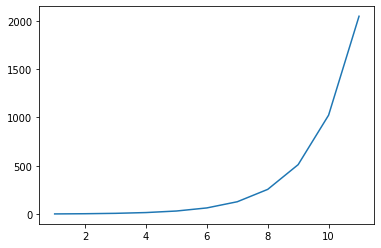

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(1,12),norm)

### 6.2 梯度弥散

In [27]:
W = tf.ones([2,2])*0.4 # 任意创建某矩阵
eigenvalues = tf.linalg.eigh(W)[0] # 计算特征值,最大特征值小于1
print(eigenvalues)

tf.Tensor([0.  0.8], shape=(2,), dtype=float32)


In [28]:
val = [W]
for i in range(10):
    val.append([val[-1]@W])
norm = list(map(lambda x:tf.norm(x).numpy(),val))
print(norm)

[0.8, 0.64000005, 0.512, 0.40960002, 0.32768002, 0.26214403, 0.20971523, 0.16777219, 0.13421775, 0.107374206, 0.08589937]


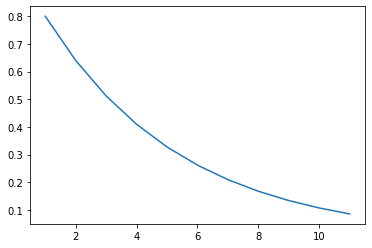

In [29]:
plt.plot(range(1,12),norm)

通过推导循环神经网络的梯度传播公式，我们发现循环神经网络很容易出现梯度弥散和梯度爆炸的现象。那么怎么解决这两个问题呢？

### 6.3梯度裁剪
梯度爆炸可以通过梯度裁剪(Gradient Clipping)的方式在一定程度上的解决。梯度裁剪与张量限幅非常类似，也是通过将梯度张量的数值或者范数限制在某个较小的区间内，从而将远大于 1 的梯度值减少，避免出现梯度爆炸。  
在深度学习中，有 3 种常用的梯度裁剪方式。  
通过梯度裁剪，可以较大程度的抑制梯度爆炸现象。  

❑ 直接对张量的数值进行限幅，使得张量𝑾的所有元素$𝑤_{𝑖𝑗} ∈ [min,max]$。在 TensorFlow中，可以通过 tf.clip_by_value()函数来实现。

In [30]:
a=tf.random.uniform([2,2])
tf.clip_by_value(a,0.4,0.6) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.5502641 , 0.4       ],
       [0.4190439 , 0.46492124]], dtype=float32)>

❑ 通过限制梯度张量𝑾的范数来实现梯度裁剪。可以通过 tf.clip_by_norm 函数方便的实现梯度张量𝑾裁剪。  

In [31]:
a=tf.random.uniform([2,2]) * 5
b = tf.clip_by_norm(a, 5)
tf.norm(a),tf.norm(b)

(<tf.Tensor: shape=(), dtype=float32, numpy=6.984134>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>)

❑ 全局范数裁剪。在 TensorFlow 中，可以通过 tf.clip_by_global_norm 函数快捷地缩放整体网络梯度𝑾的范数。  
考虑所有参数的梯度𝑾的范数，实现等比例的缩放，那么就能既很好地限制网络的梯度值，同时不改变网络的更新方向。

In [32]:
w1=tf.random.normal([3,3])
w2=tf.random.normal([3,3]) 
global_norm=tf.math.sqrt(tf.norm(w1)**2+tf.norm(w2)**2) 
(ww1,ww2),global_norm1=tf.clip_by_global_norm([w1,w2],2)#tf.clip_by_global_norm 返回裁剪后的张量 List 和 global_norm 这两个对象，其中global_norm 表示裁剪前的梯度总范数和。
global_norm2 = tf.math.sqrt(tf.norm(ww1)**2+tf.norm(ww2)**2)
print(global_norm, global_norm1,global_norm2)

tf.Tensor(3.4866557, shape=(), dtype=float32) tf.Tensor(3.4866557, shape=(), dtype=float32) tf.Tensor(2.0, shape=(), dtype=float32)


在网络训练时，梯度裁剪一般在计算出梯度后，梯度更新之前进行。

In [ ]:
with tf.GradientTape() as tape:
    logits = model(x) 
    loss = criteon(y, logits) 
grads = tape.gradient(loss, model.trainable_variables)
grads, _ = tf.clip_by_global_norm(grads, 25) 
optimizer.apply_gradients(zip(grads, model.trainable_variables))

### 6.4 梯度弥散

对于梯度弥散现象，可以通过**增大学习率、减少网络深度、添加 Skip Connection**等一系列的措施抑制。

## 7.短时记忆
研究人员发现，循环神经网络在处理较长的句子时，往往只能够理解有限长度内的信息，而对于位于较长范围类的有用信息往往不能够很好的利用起来。我们把这种现象叫做短时记忆。  
能不能够延长这种短时记忆，使得循环神经网络可以有效利用较大范围内的训练数据，从而提升性能？  
1997 年，瑞士人工智能科学家 Jürgen Schmidhuber 提出了长短时记忆网络(Long Short-Term Memory，简称 LSTM)。LSTM 相对于基础的 RNN 网络来
说，记忆能力更强，更擅长处理较长的序列信号数据，LSTM 提出后，被广泛应用在序列预测、自然语言处理等任务中，几乎取代了基础的 RNN 模型。

## 8.LSTM

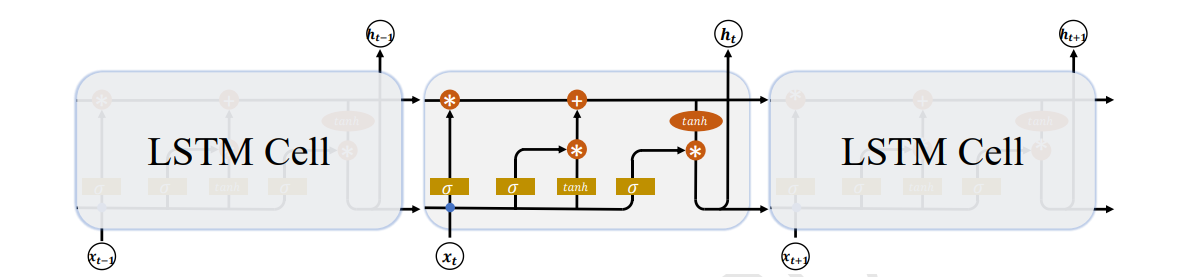

在 LSTM 中，有两个状态向量𝒄和 ，其中𝒄作为 LSTM 的内部状态向量，可以理解为LSTM 的内存状态向量 Memory，而h表示LSTM的输出向量。相对于基础的 RNN 来说，LSTM 把内部 Memory 和输出分开为两个变量，同时利用三个门控：输入门(Input Gate)、遗忘门(Forget Gate)和输出门(Output Gate)来控制内部信息的流动。

### 8.1遗忘门
遗忘门作用于 LSTM 状态向量𝒄上面，用于控制上一个时间戳的记忆$𝒄_{𝑡−1}$对当前时间戳的影响。遗忘门的控制变量$𝒈_𝑓$由  
$$g_f=\sigma(w_f[h_{t-1},x_t]+b_f)$$
产生，如图所示，其中$𝑾_𝑓$和$𝒃_𝑓$为遗忘门的参数张量，可由反向传播算法自动优化.  
$\sigma$为激活函数，一般使用 Sigmoid 函数。当门控$𝒈_𝑓$ = 1时，遗忘门全部打开，LSTM 接受上一个状态$c_{t-1}$的所有信息；当门控$𝒈_𝑓$ = 0时，遗忘门关闭，LSTM 直接忽略𝒄𝑡−1，输出为0的向量。  
经过遗忘门后，LSTM 的状态向量变为$𝒈_𝑓𝒄_{t−1}$

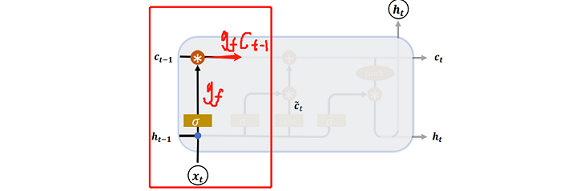

### 8.2输入门
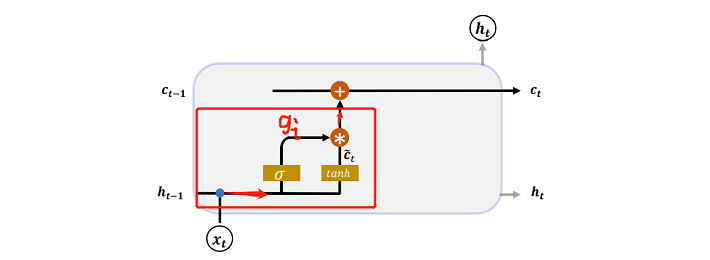

$$g_i=\sigma(w_i[h_{t-1},x_t]+b_i)$$
$𝑾_i$和$𝒃_i$为输入门的参数，需要通过反向传播算法自动优化，𝜎为激活函数，一般使用Sigmoid 函数。输入门控制变量$g_i$决定了 LSTM 对当前时间戳的新输入$\tilde{c_t}$的接受程度：当$𝒈_𝑖$ = 0时，LSTM 不接受任何的新输入$\tilde{c_t}$；当$𝒈_𝑖$ = 1时，LSTM 全部接受新输入$\tilde{c_t}$.

$$\tilde{c_t}=tanh(w_c[h_{t-1},x_t]+b_c)$$  
$𝑾_𝑐$和$𝒃_𝑐$为输入门的参数，需要通过反向传播算法自动优化，tanh 为激活函数，用于将输入标准化到[−1,1]区间.

经过输入门后，待写入 Memory 的向量为$g_i\tilde{c_t}$

### 8.3刷新 Memory
在遗忘门和输入门的控制下，LSTM 有选择地读取了上一个时间戳的记忆$𝒄_{𝑡−1}$和当前时间戳的新输入$𝒄_𝑡$，状态向量$𝒄_𝑡$的刷新方式为：
$$𝒄_𝑡 = 𝒈_𝑖\tilde{c_t} + 𝒈_𝑓𝒄_{𝑡−1}$$
得到的新状态向量$𝒄_𝑡$即为当前时间戳的状态向量.

### 8.4输出门

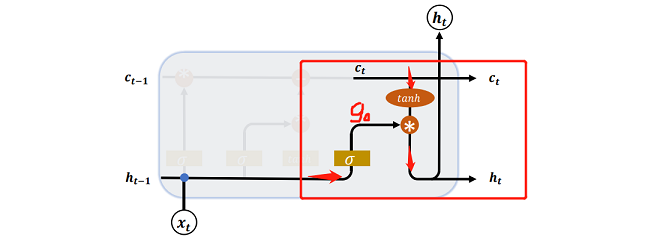

$$g_o=\sigma(w_o[h_{t-1},x_t]+b_o)$$  
其中$𝑾_𝑜$和$𝒃_𝑜$为输出门的参数，同样需要通过反向传播算法自动优化，𝜎为激活函数，一般使用 Sigmoid 函数。当输出门$𝒈_𝑜$ = 0时，输出关闭，LSTM 的内部记忆完全被隔断，无法用作输出，此时输出为 0 的向量；当输出门$𝒈_𝑜$ = 1时，输出完全打开，LSTM 的状态向量$𝒄_𝑡$全部用于输出.

$$h_t=g_o \bullet tanh(c_t)$$  
由于$𝒈_𝑜$ ∈[0,1]，tanh($𝒄_t$) ∈ [−1,1]，因此 LSTM 的输出 $h_𝑡$ ∈ [−1,1]。

### 8.5LSTM层使用方法
在 TensorFlow 中，同样有两种方式实现 LSTM 网络。既可以使用 LSTMCell 来手动完成时间戳上面的循环运算，也可以通过 LSTM 层方式一步完成前向运算。

In [34]:
x = tf.random.normal([2,80,100])
xt = x[:,0,:] 
cell = tf.keras.layers.LSTMCell(64) 
# 初始化状态和输出 List,[h,c]
state = [tf.zeros([2,64]),tf.zeros([2,64])]
out, state = cell(xt, state) # 前向计算
# 查看返回元素的 id
id(out),id(state[0]),id(state[1])

(1519064932600, 1519064932600, 1519064932952)

In [35]:
state = [tf.zeros([2,64]),tf.zeros([2,64])]
for xt in tf.unstack(x, axis=1): 
    out, state = cell(xt, state)
out.shape,state[0].shape,state[1].shape

(TensorShape([2, 64]), TensorShape([2, 64]), TensorShape([2, 64]))

通过 tf.keras.layers.LSTM 层可以方便的一次完成整个序列的运算。

In [36]:
layer = tf.keras.layers.LSTM(64)
out = layer(x)
out.shape

TensorShape([2, 64])

经过 LSTM 层前向传播后，默认只会返回最后一个时间戳的输出，如果需要返回每个时间戳上面的输出，需要设置 return_sequences=True 标志。

In [37]:
layer = tf.keras.layers.LSTM(64, return_sequences=True)
out = layer(x)
out.shape

TensorShape([2, 80, 64])

对于多层神经网络，可以通过 Sequential 容器包裹多层 LSTM 层，并设置所有非末层网络 return_sequences=True，这是因为非末层的 LSTM 层需要上一层在所有时间戳的输出作为输入。

In [38]:
net = tf.keras.Sequential([
 tf.keras.layers.LSTM(64, return_sequences=True), # 非末层需要返回所有时间戳输出
 tf.keras.layers.LSTM(64)
])
out = net(x)
out.shape

TensorShape([2, 64])

## 9.GRU
LSTM 具有更长的记忆能力，在大部分序列任务上面都取得了比基础的 RNN 模型更好的性能表现，更重要的是，LSTM 不容易出现梯度弥散现象。但是 LSTM 结构相对较复杂，计算代价较高，模型参数量较大。  
门控循环网络(Gated Recurrent Unit，简称 GRU)是应用最广泛的 RNN 变种之一。GRU把内部状态向量和输出向量合并，统一为状态向量 ，门控数量也减少到 2 个：复位门(Reset Gate)和更新门(Update Gate)，如图所示。  

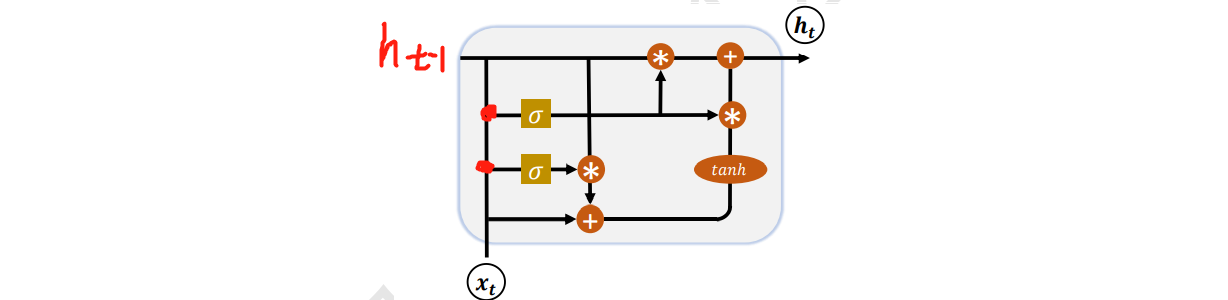

### 9.1复位门
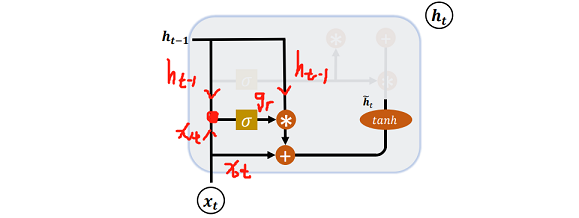

复位门用于控制上一个时间戳的状态 𝑡−1进入 GRU 的量。门控向量𝒈𝑟由当前时间戳输入𝒙𝑡和上一时间戳状态 𝑡−1变换得到，关系如下：  
$$g_r=\sigma(w_r[h_{t-1},x_t]+b_r)$$  
其中$𝑾_𝑟$和$𝒃_𝑟$为复位门的参数，由反向传播算法自动优化，𝜎为激活函数，一般使用Sigmoid 函数。门控向量$𝒈_𝑟$只控制状态$h_{𝑡−1}$，而不会控制输入$𝒙_t$.

$$\tilde{h_t}=tanh(w_hx_t+b_h+g_rh_{t-1})$$

当$𝒈_𝑟$ = 0时，新输入$\tilde{h_t}$全部来自于输入$𝒙_𝑡$，不接受$h_{𝑡−1}$，此时相当于复位$h_{𝑡−1}$。当$𝒈_𝑟$ = 1时，$h_{𝑡−1}$和输入$𝒙_𝑡$共同产生新输入. 

### 9.2更新门
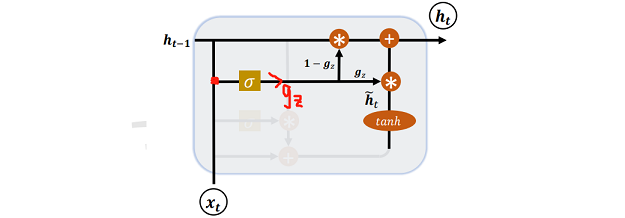

$$g_z=\sigma(w_z[h_{t-1},x_t]+b_z)$$  
其中$𝑊_𝑧$和$𝒃_𝑧$为更新门的参数，由反向传播算法自动优化，𝜎为激活函数，一般使用Sigmoid函数。$𝒈_𝑧$用与控制新输入$\tilde{h_t}$信号，$1−𝒈_𝑧$用于控制状态$h_{𝑡−1}$信号：

$$h_t=(1-g_z)h_{t-1}+\tilde{h_t}g_z$$  
可以看到，$\tilde{h_t}$和$h_{𝑡−1}$对$h_𝑡$的更新量处于相互竞争、此消彼长的状态。当更新门$𝒈_𝑧$ = 0时，$h_𝑡$全部来自上一时间戳状态$h_{𝑡−1}$；当更新门$𝒈_𝑧$ = 1时,$h_𝑡$全部来自新输入$\tilde{h_t}$。

### 9.3GRU使用

同样地，在 TensorFlow 中，也有 Cell 方式和层方式实现 GRU 网络。

创建 GRU Cell 对象，并在时间轴上循环展开运算。

In [39]:
h = [tf.zeros([2,64])]
cell = tf.keras.layers.GRUCell(64) 
for xt in tf.unstack(x, axis=1):
    out, h = cell(xt, h)
out.shape

TensorShape([2, 64])

通过 layers.GRU 类可以方便创建一层 GRU 网络层，通过 Sequential 容器可以堆叠多层 GRU 层的网络。

In [40]:
net = tf.keras.Sequential([tf.keras.layers.GRU(64, return_sequences=True),
                        tf.keras.layers.GRU(64)
])
out = net(x)
out.shape

TensorShape([2, 64])